Рассматриваем метод $k$ ближайших соседей ($k$ Nearest Neighbours – $k$NN)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

# Сгенерируем данные

### Как генерировать случайные данные?

In [3]:
from sklearn.datasets import make_blobs

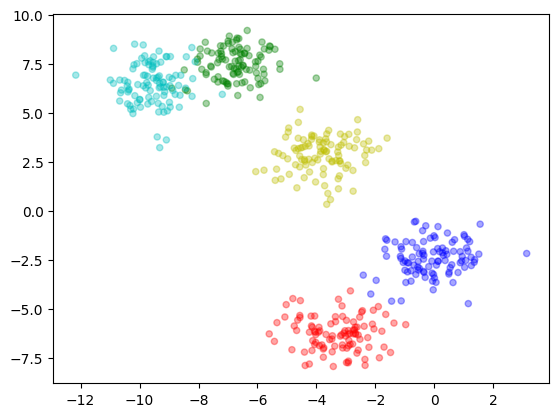

In [41]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, cluster_std=0.9, 
               center_box = (-10.0, 10.0), shuffle = False)
plt.scatter(X[:, 0], X[:, 1], color = np.array(['b', 'r', 'g', 'c', 'y'])[y], s = 20, alpha = 0.35)

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

_Многомерное нормальное распределение_ (_распределение Гаусса_):
$$
\varphi(x, \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d\det\Sigma}}e^{-\frac{1}{2}(x-\mu)^{\top}\Sigma^{-1}(x-\mu)}
$$

In [42]:
mu1 = np.array((0.4, 0.8))
mu2 = np.array((0.8, 0.6))
mu3 = np.array((0.1, 0.2))
mu4 = np.array((1.0, 0.3))
sigma = 0.3
d = 2

In [64]:
def generate_data(N=200):
    from sklearn.datasets import make_blobs
    X, y = make_blobs(n_samples = N, centers = [mu1, mu2, mu3, mu4], cluster_std = sigma, 
                      shuffle = False)
    y[y == 1] = 0
    y[y == 2] = 1
    y[y == 3] = 1
    return X, y

N = 200
X, y = generate_data(N)
X_test, y_test = generate_data(N)
print(X.shape)
print(y.shape)
print(y)

(200, 2)
(200,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


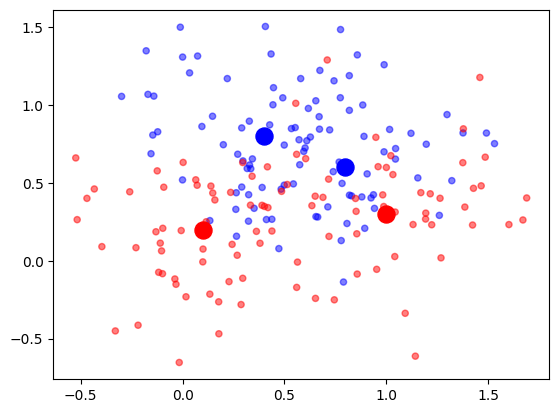

In [65]:
plt.scatter(X[:, 0], X[:, 1], color = np.array(('b', 'r'))[y], s = 20, alpha = 0.5)
plt.scatter([mu1[0], mu2[0]], [mu1[1], mu2[1]], color = 'b', s = 150, alpha = 1)
plt.scatter([mu3[0], mu4[0]], [mu3[1], mu4[1]], color = 'r', s = 150, alpha = 1)

In [53]:
def normal_density(X, mu, std = sigma):
    return np.exp(-np.sum((X - mu)**2, axis = 1)/(2*std**2))/(2*np.pi*std)

def bayes_predict(X):
    return np.argmax(np.vstack([normal_density(X, mu1) + normal_density(X, mu2),
                                normal_density(X, mu3) + normal_density(X, mu4)]), axis = 0)

def compute_bayes_sep_curve(res = 100):
    xx0_min, xx0_max = plt.xlim()
    xx1_min, xx1_max = plt.ylim()
    xx0, xx1 = np.meshgrid(np.linspace(xx0_min, xx0_max, res), np.linspace(xx1_min, xx1_max, res))
    yy = bayes_predict(np.hstack((np.reshape(xx0, (res**2, 1)), np.reshape(xx1, (res**2, 1)))))   
    yy = yy.reshape(xx0.shape)
    return xx0, xx1, yy

def draw_bayes_sep_curve(bsc):
    xx0, xx1, yy = bsc
    xx0_min, xx0_max = plt.xlim()
    xx1_min, xx1_max = plt.ylim()
    plt.contour(xx0, xx1, yy, 1, colors = 'k', linestyles = 'dashed')
    plt.xlim((xx0_min, xx0_max))
    plt.ylim((xx1_min, xx1_max))

def draw_bayes(bsc):
    xx0, xx1, yy = bsc
    xx0_min, xx0_max = plt.xlim()
    xx1_min, xx1_max = plt.ylim()
    plt.contourf(xx0, xx1, yy, 1, alpha = 0.25, colors = ('b', 'r'))
    plt.contour(xx0, xx1, yy, 1, colors = 'k')
    plt.xlim((xx0_min, xx0_max))
    plt.ylim((xx1_min, xx1_max))
    
def draw_sep_curve(model, res = 100):
    xx0_min, xx0_max = plt.xlim()
    xx1_min, xx1_max = plt.ylim()
    xx0, xx1 = np.meshgrid(np.linspace(xx0_min, xx0_max, res), np.linspace(xx1_min, xx1_max, res))
    yy = model.predict(np.hstack((np.reshape(xx0, (res**2, 1)), np.reshape(xx1, (res**2, 1)))))   
    yy = yy.reshape(xx0.shape)
    plt.contourf(xx0, xx1, yy, 1, alpha = 0.25, colors = ('b', 'r'))
    plt.contour(xx0, xx1, yy, 1, colors = 'k')
    plt.xlim((xx0_min, xx0_max))
    plt.ylim((xx1_min, xx1_max))  

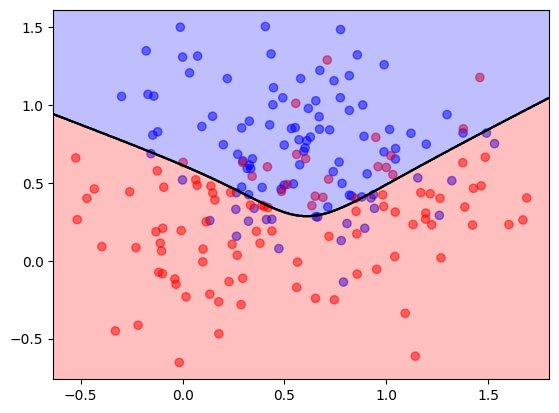

In [66]:
plt.scatter(X[:, 0], X[:, 1], color = np.array(('b', 'r'))[y], alpha = 0.5)
bsc = compute_bayes_sep_curve(res = 1000)
draw_bayes(bsc)

# Создаем и тренируем классификатор

In [60]:
from sklearn import neighbors

In [67]:
model = neighbors.KNeighborsClassifier(n_neighbors = 1)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [68]:
print(model.predict([[1, .5]]))
print(model.predict([[1, .5], [0.5, 1], [0.5, 2]]))

[1]
[1 0 0]


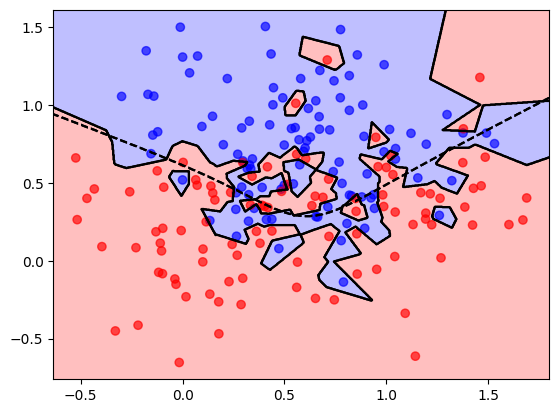

In [75]:
plt.scatter(X[:, 0], X[:, 1], color = np.array(('b', 'r'))[y], alpha = 0.65)
draw_sep_curve(model, res = 1000)
draw_bayes_sep_curve(bsc)

In [82]:
np.mean(model.predict(X) == y)           # Точность на обучающей выборке

1.0

In [83]:
np.mean(model.predict(X) != y)           # Ошибка на обучающей выборке

0.0

In [77]:
np.mean(model.predict(X_test) == y_test) # Точность на тестовой выборке

0.74

In [84]:
np.mean(model.predict(X_test) != y_test) # Ошибка на тестовой выборке

0.26

In [91]:
model = neighbors.KNeighborsClassifier(n_neighbors = 50)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=50)

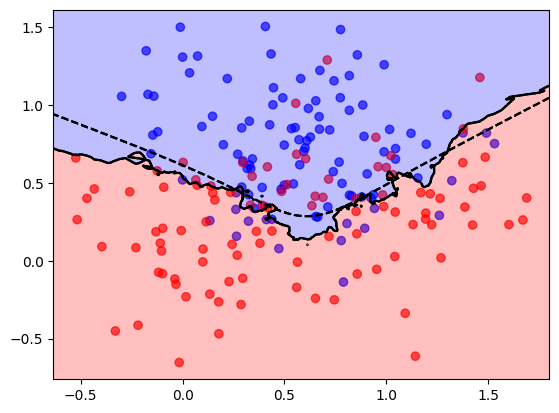

In [92]:
plt.scatter(X[:, 0], X[:, 1], color = np.array(('b', 'r'))[y], alpha = 0.65)
draw_sep_curve(model, res = 1000)
draw_bayes_sep_curve(bsc)

In [97]:
print(np.mean(model.predict(X) != y))   # Ошибка на обучающей выборке
y_test_pred = model.predict(X_test)
print(np.mean(y_test_pred != y_test))   # Ошибка на тестовой выборке

0.235
0.165


In [96]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(y_test_pred, y_test)

array([[88, 21],
       [12, 79]], dtype=int64)

([<matplotlib.axis.YTick at 0x1dc2995b760>,
 [Text(0, 0, '0'), Text(0, 1, '1')])

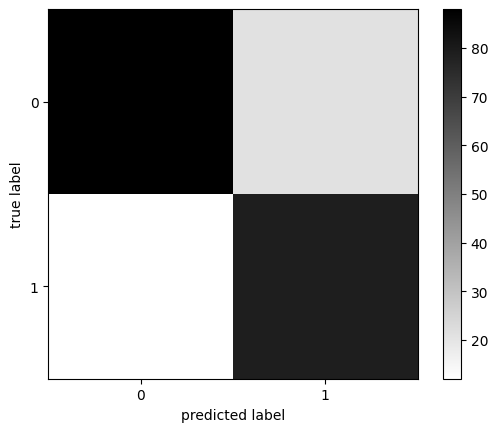

In [99]:
plt.imshow(sk.metrics.confusion_matrix(y_test_pred, y_test), 
           interpolation='nearest', cmap = plt.cm.binary)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.xticks([0, 1])
plt.yticks([0, 1])

In [111]:
kk = [1, 3, 5, 7] + list(range(10, 91, 10))
kk

[1, 3, 5, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [112]:
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X, y)
    err_train.append(np.mean(model.predict(X) != y))
    err_test.append(np.mean(model.predict(X_test) != y_test))

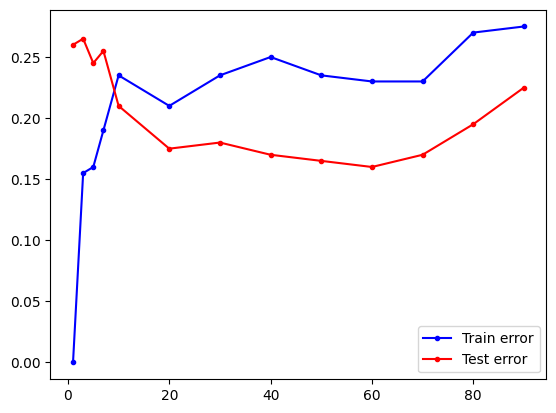

In [115]:
plt.plot(kk, err_train, '.-b', label = 'Train error')
plt.plot(kk, err_test,  '.-r', label = 'Test error')    
plt.legend()

In [116]:
print(min(err_test))
print(kk[np.argmin(err_test)])

0.16
60


(91.0, 0.0)

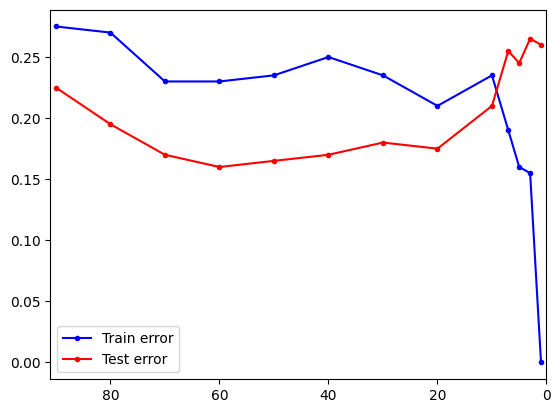

In [124]:
plt.plot(kk, err_train, '.-b', label = 'Train error')
plt.plot(kk, err_test,  '.-r', label = 'Test error')    
plt.legend()
plt.xlim([91, 0]) # invert x axis